# APRENDIZAJE AUTOMÁTICO - CAPITULO 6

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

%matplotlib inline

In [2]:
df=pd.read_csv('DATAFRAME_FINAL_FINALISIMO.csv')
df.shape

(4762, 89)

In [3]:
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,ratio_digits_url,ratio_digits_hostname,ratio_digits_path,ratio_simbolos_url,ratio_simbolos_hostname,ratio_simbolos_path,ratio_mayus_url,...,is_live,connection_speed,days_since_update_date,days_since_first_seen,days_since_last_seen,registration_country,hosting_country,isp,case_changes_path,ratio_min_url
0,0,0,0,0.0,0.0,0.0,0.233333,0.142857,1.000000,0.0,...,False,0.0,0,2118,12,Unknown,United States,Microsoft Corporation,0.0,0.766667
1,1,1,1,0.0,0.0,0.0,0.187500,0.086957,1.000000,0.0,...,False,0.0,0,0,0,Unknown,United States,Google LLC,0.0,0.812500
2,2,2,2,0.0,0.0,0.0,0.210526,0.153846,0.166667,0.0,...,False,0.0,0,1964,996,Unknown,Ireland,"Facebook, Inc.",0.0,0.789474
3,3,3,3,0.0,0.0,0.0,0.200000,0.095238,1.000000,0.0,...,False,0.0,0,1819,14,Unknown,Spain,Google LLC,0.0,0.800000
4,4,4,4,0.0,0.0,0.0,0.200000,0.095238,1.000000,0.0,...,False,0.0,0,1819,14,Unknown,Spain,Google LLC,0.0,0.800000


In [4]:
Y=pd.read_csv('LABEL_FINAL_FINALISIMO.csv')
Y.shape

(4762, 5)

In [5]:
Y.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Unnamed: 1,is_malicious
0,0,0,0,NaN,1.0
1,1,1,1,NaN,1.0
2,2,2,2,NaN,1.0
3,3,3,3,NaN,1.0
4,4,4,4,NaN,1.0


## Limpieza inicial

Limpieza inicial de los datos (eliminar columnas sin información, NaN, datos duplicados, faltantes, etc.)

In [6]:
df=df.drop(['Unnamed: 0'],axis=1)
df=df.drop(['Unnamed: 0.1'],axis=1)
df=df.drop(['Unnamed: 0.2'],axis=1)

In [7]:
Y=Y.drop(['Unnamed: 0'],axis=1)
Y=Y.drop(['Unnamed: 0.1'],axis=1)
Y=Y.drop(['Unnamed: 1'],axis=1)
Y=Y.drop(['Unnamed: 0.2'],axis=1)

In [8]:
X_clean=df.copy()
X_clean["is_malicious"]=Y["is_malicious"].copy()

In [9]:
X_clean.shape

(4762, 87)

In [10]:
X_clean.head()

,ratio_digits_url,ratio_digits_hostname,ratio_digits_path,ratio_simbolos_url,ratio_simbolos_hostname,ratio_simbolos_path,ratio_mayus_url,ratio_minus_url,ratio_mayus_hostname,ratio_min_hostname,...,connection_speed,days_since_update_date,days_since_first_seen,days_since_last_seen,registration_country,hosting_country,isp,case_changes_path,ratio_min_url,is_malicious
0,0.0,0.0,0.0,0.233333,0.142857,1.000000,0.0,NaN,0.0,0.857143,...,0.0,0,2118,12,Unknown,United States,Microsoft Corporation,0.0,0.766667,1.0
1,0.0,0.0,0.0,0.187500,0.086957,1.000000,0.0,NaN,0.0,0.913043,...,0.0,0,0,0,Unknown,United States,Google LLC,0.0,0.812500,1.0
2,0.0,0.0,0.0,0.210526,0.153846,0.166667,0.0,NaN,0.0,0.846154,...,0.0,0,1964,996,Unknown,Ireland,"Facebook, Inc.",0.0,0.789474,1.0
3,0.0,0.0,0.0,0.200000,0.095238,1.000000,0.0,NaN,0.0,0.904762,...,0.0,0,1819,14,Unknown,Spain,Google LLC,0.0,0.800000,1.0
4,0.0,0.0,0.0,0.200000,0.095238,1.000000,0.0,NaN,0.0,0.904762,...,0.0,0,1819,14,Unknown,Spain,Google LLC,0.0,0.800000,1.0


#### Quitar columnas con solo un valor o NaN (no aporta información)

In [11]:
for index in range(X_clean.shape[1]):
    #Solo tiene un valor
    if(X_clean.iloc[:,index].nunique()==1):
        print("Columna :"+ X_clean.iloc[:, index].name)

Columna :ratio_mayus_hostname
Columna :case_changes_hostname
Columna :cisco_in_hostname
Columna :key_client
Columna :key_admin
Columna :key_server
Columna :key_login
Columna :age_host
Columna :intented_life_span
Columna :life_remaining
Columna :ttl_from_registration
Columna :days_since_update_date
Columna :registration_country


In [12]:
#Quitar las columnas sin nada (Nan, todo 0s)
X_clean=X_clean.drop(["ratio_mayus_hostname"],axis=1)
X_clean=X_clean.drop(["case_changes_hostname"],axis=1)
X_clean=X_clean.drop(["cisco_in_hostname"],axis=1)
X_clean=X_clean.drop(["key_client"],axis=1)
X_clean=X_clean.drop(["key_admin"],axis=1)
X_clean=X_clean.drop(["key_server"],axis=1)
X_clean=X_clean.drop(["key_login"],axis=1)
X_clean=X_clean.drop(["age_host"],axis=1)
X_clean=X_clean.drop(["intented_life_span"],axis=1)
X_clean=X_clean.drop(["life_remaining"],axis=1)
X_clean=X_clean.drop(["ttl_from_registration"],axis=1)
X_clean=X_clean.drop(["days_since_update_date"],axis=1)
X_clean=X_clean.drop(["registration_country"],axis=1)
X_clean=X_clean.drop(["case_changes_path,"],axis=1)

In [13]:
X_clean.head()

,ratio_digits_url,ratio_digits_hostname,ratio_digits_path,ratio_simbolos_url,ratio_simbolos_hostname,ratio_simbolos_path,ratio_mayus_url,ratio_minus_url,ratio_min_hostname,ratio_mayus_path,...,num_open_ports,is_live,connection_speed,days_since_first_seen,days_since_last_seen,hosting_country,isp,case_changes_path,ratio_min_url,is_malicious
0,0.0,0.0,0.0,0.233333,0.142857,1.000000,0.0,NaN,0.857143,0.000000,...,2,False,0.0,2118,12,United States,Microsoft Corporation,0.0,0.766667,1.0
1,0.0,0.0,0.0,0.187500,0.086957,1.000000,0.0,NaN,0.913043,0.000000,...,13,False,0.0,0,0,United States,Google LLC,0.0,0.812500,1.0
2,0.0,0.0,0.0,0.210526,0.153846,0.166667,0.0,NaN,0.846154,0.833333,...,2,False,0.0,1964,996,Ireland,"Facebook, Inc.",0.0,0.789474,1.0
3,0.0,0.0,0.0,0.200000,0.095238,1.000000,0.0,NaN,0.904762,0.000000,...,2,False,0.0,1819,14,Spain,Google LLC,0.0,0.800000,1.0
4,0.0,0.0,0.0,0.200000,0.095238,1.000000,0.0,NaN,0.904762,0.000000,...,2,False,0.0,1819,14,Spain,Google LLC,0.0,0.800000,1.0


#### Variables nulas

In [14]:
X_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4762 entries, 0 to 4761
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ratio_digits_url             4762 non-null   float64
 1   ratio_digits_hostname        4762 non-null   float64
 2   ratio_digits_path            4762 non-null   float64
 3   ratio_simbolos_url           4762 non-null   float64
 4   ratio_simbolos_hostname      4762 non-null   float64
 5   ratio_simbolos_path          4762 non-null   float64
 6   ratio_mayus_url              4762 non-null   float64
 7   ratio_minus_url              0 non-null      float64
 8   ratio_min_hostname           4762 non-null   float64
 9   ratio_mayus_path             4762 non-null   float64
 10  ratio_min_path               4762 non-null   float64
 11  num_tokens_path              4762 non-null   int64  
 12  num_hyphen_hostname          4762 non-null   int64  
 13  len_url           

C:\Users\afric\AppData\Local\Temp\ipykernel_18896\1418384756.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  X_clean.info(verbose=True, null_counts=True)


In [15]:
X_clean=X_clean.drop(['ratio_minus_url'],axis=1)

In [16]:
#Sustituiomos valores nulos por 1
X_clean=X_clean.replace(np.nan,1)

#### Sustituir bool por valores numéricos

In [17]:
X_clean=X_clean.replace(True,1)
X_clean=X_clean.replace(False,0)

#### Variables String

Se podría realizar one hot encoding, pero como resultado se obtinen demasiadas columnas. Podría realizarse agrupación por cercania geográfica, pero este parámetro no aporta información relevante, ya que igual están desviando el tráfico de una red a otra, por lo que esta información no es relevante, se extrae por tanto este parámetro.

In [18]:
hosting_country_cod=pd.get_dummies(X_clean['hosting_country'],prefix='Country')
hosting_country_cod.head()

,Country_Australia,Country_Austria,Country_Belgium,Country_Canada,Country_China,Country_Czechia,Country_Denmark,Country_France,Country_Germany,Country_Hong Kong,...,Country_Singapore,Country_Slovakia,Country_South Africa,Country_Spain,Country_Sweden,Country_Switzerland,Country_Ukraine,Country_United Kingdom,Country_United States,Country_Unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [19]:
isp_cod=pd.get_dummies(X_clean['isp'],prefix='isp')
isp_cod.head()

,"isp_10dencehispahard, S.L.",isp_ANEXIA Internetdienstleistungs GmbH,isp_AVAST Software s.r.o.,isp_Adform A/S,isp_Adjust GmbH,isp_Akamai International B.V.,"isp_Akamai Technologies, Inc.","isp_Alibaba (US) Technology Co., Ltd.","isp_Amazon.com, Inc.",isp_Amobee EMEA Limited,...,isp_Volia-Cable LLC,isp_WEBORAMA SA,isp_Webtrekk GmbH,"isp_Weebly, Inc.",isp_Yahoo! UK Services Limited,"isp_Zhejiang Taobao Network Co.,Ltd",isp_Zscaler Switzerland GmbH,"isp_acens Technologies, S.L.","isp_adMarketplace, Inc.",isp_myLoc managed IT AG
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X_clean=X_clean.drop(['hosting_country'],axis=1)
X_clean=X_clean.drop(['isp'],axis=1)

## Distribución de los datos

In [21]:
X_clean.columns
len(X_clean.columns)

70

In [22]:
X_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
ratio_digits_url,4762.0,0.026420,0.061199,0.000000,0.000000,0.000000,0.037037,0.525000
ratio_digits_hostname,4762.0,0.019303,0.068541,0.000000,0.000000,0.000000,0.000000,0.800000
ratio_digits_path,4762.0,0.021768,0.071291,0.000000,0.000000,0.000000,0.000000,0.471910
ratio_simbolos_url,4762.0,0.207091,0.044248,0.050360,0.181818,0.205882,0.240000,0.333333
ratio_simbolos_hostname,4762.0,0.120592,0.037715,0.040541,0.083333,0.117647,0.142857,0.300000
...,...,...,...,...,...,...,...,...
days_since_first_seen,4762.0,1135.758085,1840.481137,0.000000,0.000000,9.000000,1820.000000,9349.000000
days_since_last_seen,4762.0,111.332633,290.196639,0.000000,0.000000,0.000000,55.000000,3239.000000
case_changes_path,4762.0,0.581898,3.885587,0.000000,0.000000,0.000000,0.000000,54.000000
ratio_min_url,4762.0,0.757737,0.077135,0.227273,0.720000,0.776699,0.818182,0.866667


In [23]:
Y['is_malicious'].value_counts()

1.0    2758
0.0    2004
Name: is_malicious, dtype: int64

<AxesSubplot:xlabel='is_malicious', ylabel='count'>

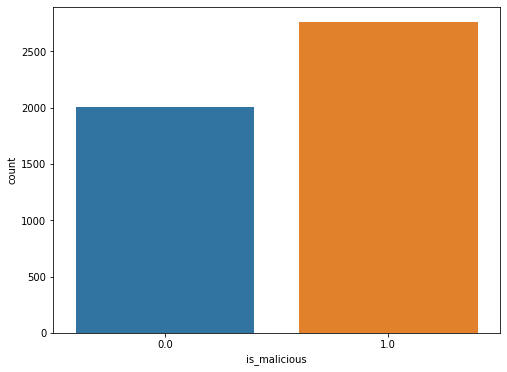

In [24]:
# 1: Malicioso
# 0: No malicioso
plt.figure(figsize=(8,6))
sns.countplot(x=Y['is_malicious'])

In [25]:
X_clean.columns

Index(['ratio_digits_url', 'ratio_digits_hostname', 'ratio_digits_path',
       'ratio_simbolos_url', 'ratio_simbolos_hostname', 'ratio_simbolos_path',
       'ratio_mayus_url', 'ratio_min_hostname', 'ratio_mayus_path',
       'ratio_min_path', 'num_tokens_path', 'num_hyphen_hostname', 'len_url',
       'len_hostname', 'len_path', 'len_param', 'long_token_host',
       'long_token_path', 'long_token_param', 'Long_token_URL',
       'hostPathRatio', 'hostParamRatio', 'hostUrlRatio', 'pathUrlRatio',
       'paramUrlRatio', 'count_special_char_url',
       'count_special_char_hostname', 'count_special_char_path',
       'count_special_char_param', 'count_digits_url', 'count_digits_hostname',
       'count_digits_path', 'count_digits_param', 'count_letter_url',
       'count_letter_hostname', 'count_letter_path', 'count_letter_param',
       'count_tokens_hostname', 'count_tokens_path', 'count_tokens_param',
       'count_non_alpha_url', 'count_non_alpha_hostname',
       'count_non_alpha_

#### Ver distribución variable para categoría maliciosa y no maliciosa

C:\Users\afric\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\afric\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\afric\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

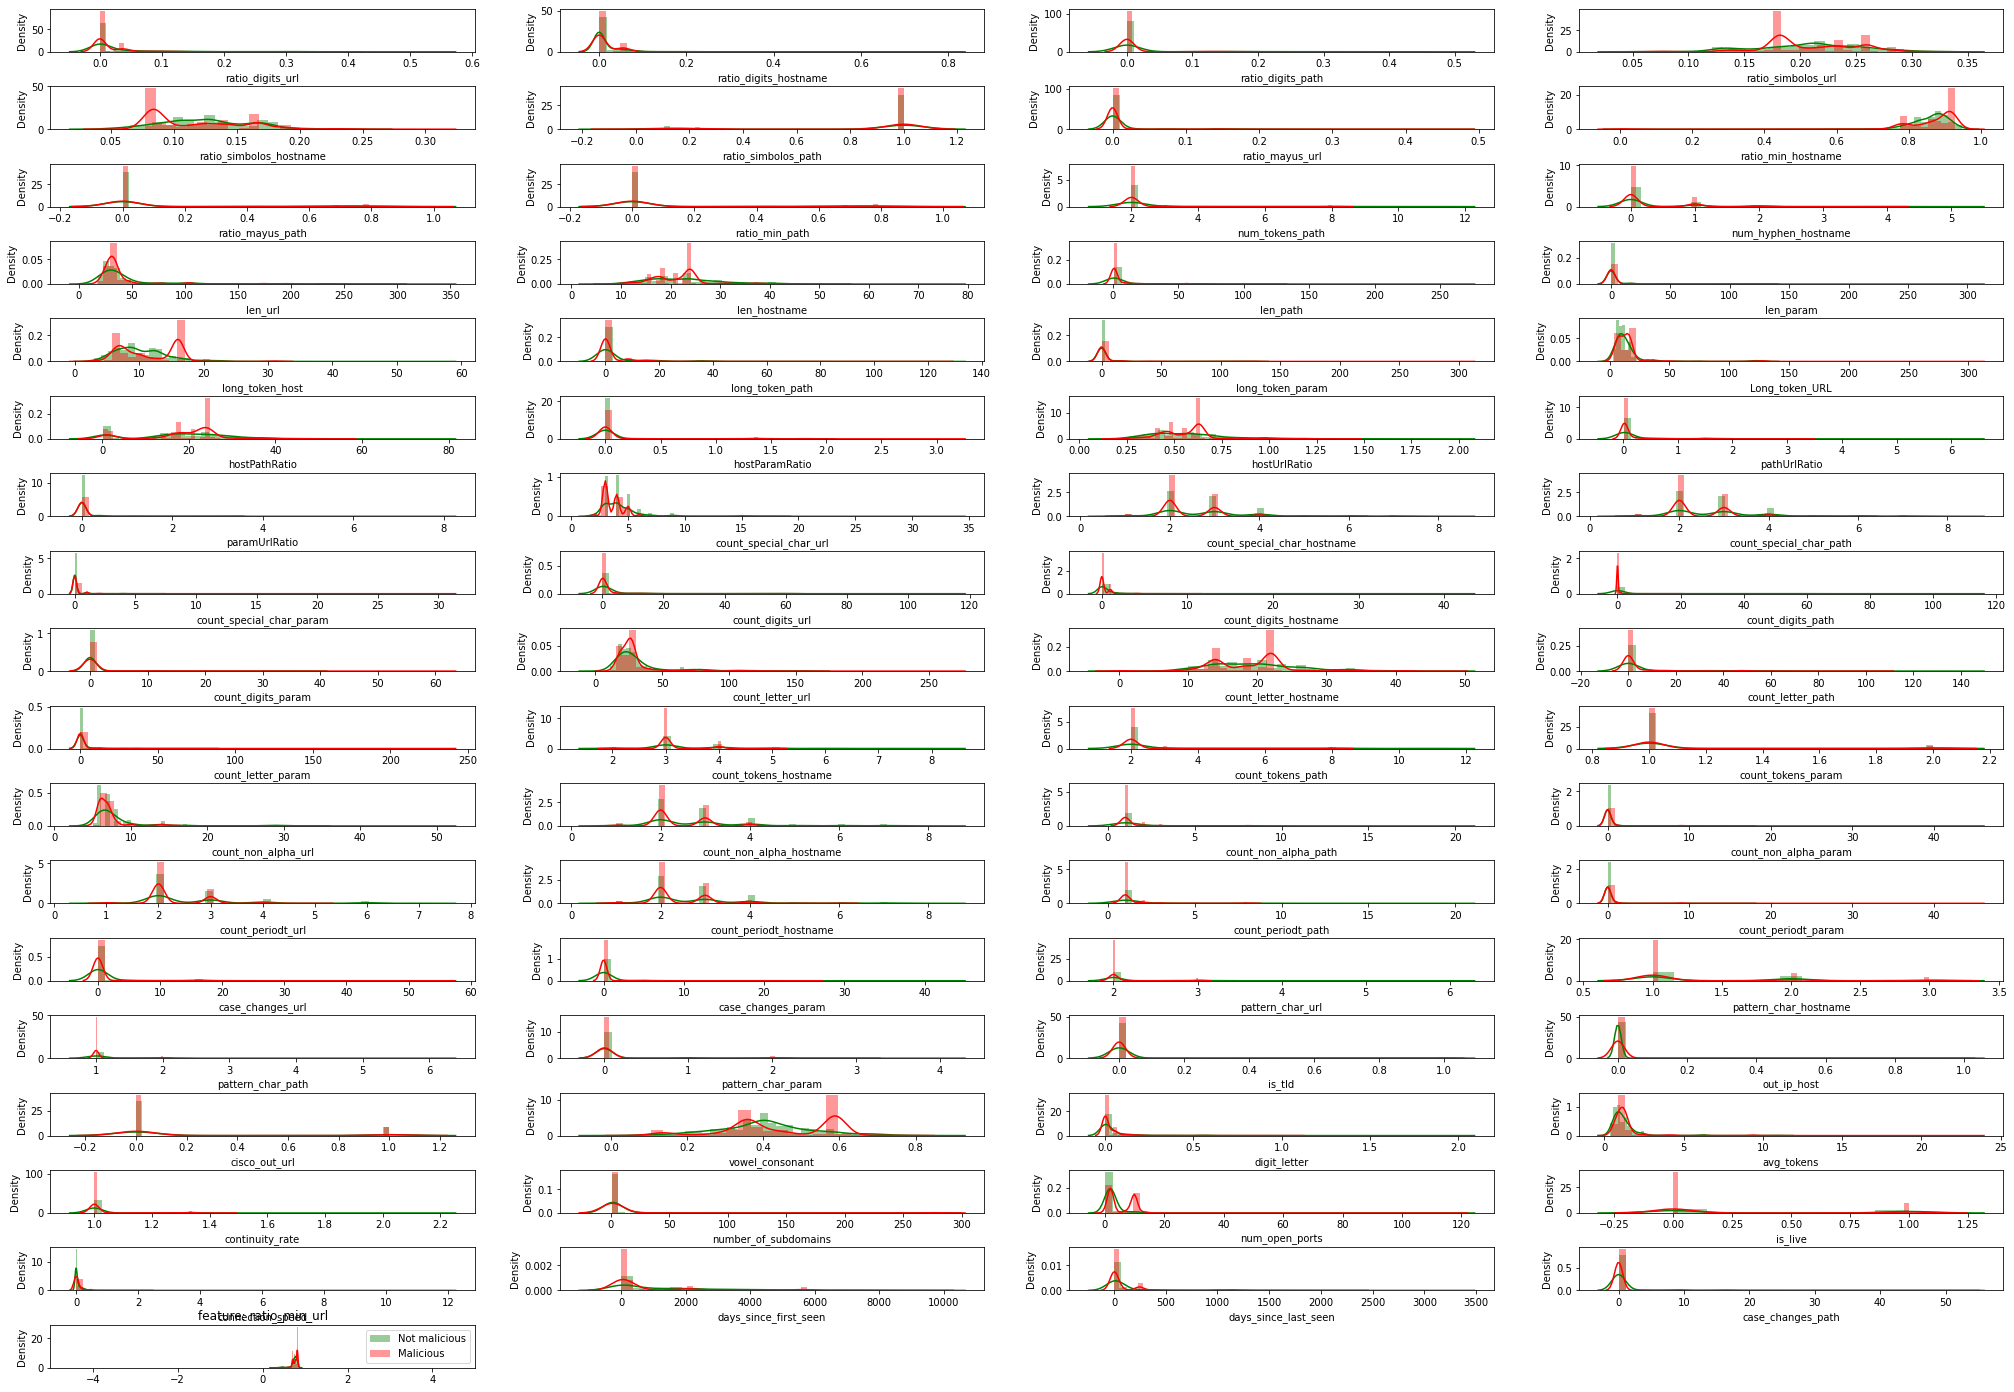

In [26]:
features = X_clean.drop(['is_malicious'], axis=1)

plt.figure(figsize=(35,25))
gs = gridspec.GridSpec(18, 4)
gs.update(hspace=0.8)

for i, f in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(X_clean[f][X_clean['is_malicious'] == 0], label = 'Not malicious', color='green')
    sns.distplot(X_clean[f][X_clean['is_malicious'] == 1], label = 'Malicious', color='red')

ax.set_xlabel('')
ax.set_xlim(-5,5)
ax.set_title('feature: ' + str(f))
plt.legend(loc = 0)

## Preprocesado datos

### División de datos en conjunto de entrenamiento y testeo

In [27]:
X_clean.shape

(4762, 70)

In [28]:
from sklearn.model_selection import train_test_split
X_clean_new=X_clean.drop(["is_malicious"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_clean_new, Y, test_size=0.20, random_state=42)

In [29]:
print(f'El tamaño del dataset de entrenamiento es = {len(X_train)}')
print(f'El tamaño del dataset de entrenamiento es = {len(X_test)}')

El tamaño del dataset de entrenamiento es = 3809
El tamaño del dataset de entrenamiento es = 953


### Transformador Quantil

Aplica una transformación no lineal de modo que la función de densidad de probabilidad de cada característica será mapeada a una distribució uniforme gaussiana. Todos los datos, incluidos los outliers, son mapeadas a una distribución uniforme en el rango [0,1].

In [30]:
from sklearn.preprocessing import QuantileTransformer

qscaler = QuantileTransformer(output_distribution='normal')
X_train_qsc = pd.DataFrame(qscaler.fit_transform(X_train), columns=X_clean_new.columns, index=X_train.index)
X_test_qsc = pd.DataFrame(qscaler.transform(X_test), columns=X_clean_new.columns, index=X_test.index)
X_train_qsc.describe().T

,count,mean,std,min,25%,50%,75%,max
ratio_digits_url,3809.0,-3.275998,2.933645,-5.199338,-5.199338,-5.199338,0.676854,5.199338
ratio_digits_hostname,3809.0,-3.777022,2.710510,-5.199338,-5.199338,-5.199338,-5.199338,5.199338
ratio_digits_path,3809.0,-4.437330,2.169663,-5.199338,-5.199338,-5.199338,-5.199338,5.199338
ratio_simbolos_url,3809.0,0.005435,1.012556,-5.199338,-0.546700,-0.005018,0.681594,5.199338
ratio_simbolos_hostname,3809.0,0.009286,0.995583,-5.199338,-0.957454,0.035135,0.586473,5.199338
...,...,...,...,...,...,...,...,...
connection_speed,3809.0,-3.382930,2.897068,-5.199338,-5.199338,-5.199338,0.674314,5.199338
days_since_first_seen,3809.0,-2.185575,3.029047,-5.199338,-5.199338,0.000191,0.683178,5.199338
days_since_last_seen,3809.0,-2.193455,3.028003,-5.199338,-5.199338,0.031369,0.672129,5.199338
case_changes_path,3809.0,-4.863647,1.532437,-5.199338,-5.199338,-5.199338,-5.199338,5.199338


array([[<AxesSubplot:title={'center':'ratio_digits_url'}>,
        <AxesSubplot:title={'center':'ratio_digits_hostname'}>,
        <AxesSubplot:title={'center':'ratio_digits_path'}>,
        <AxesSubplot:title={'center':'ratio_simbolos_url'}>,
        <AxesSubplot:title={'center':'ratio_simbolos_hostname'}>,
        <AxesSubplot:title={'center':'ratio_simbolos_path'}>,
        <AxesSubplot:title={'center':'ratio_mayus_url'}>,
        <AxesSubplot:title={'center':'ratio_min_hostname'}>],
       [<AxesSubplot:title={'center':'ratio_mayus_path'}>,
        <AxesSubplot:title={'center':'ratio_min_path'}>,
        <AxesSubplot:title={'center':'num_tokens_path'}>,
        <AxesSubplot:title={'center':'num_hyphen_hostname'}>,
        <AxesSubplot:title={'center':'len_url'}>,
        <AxesSubplot:title={'center':'len_hostname'}>,
        <AxesSubplot:title={'center':'len_path'}>,
        <AxesSubplot:title={'center':'len_param'}>],
       [<AxesSubplot:title={'center':'long_token_host'}>,
     

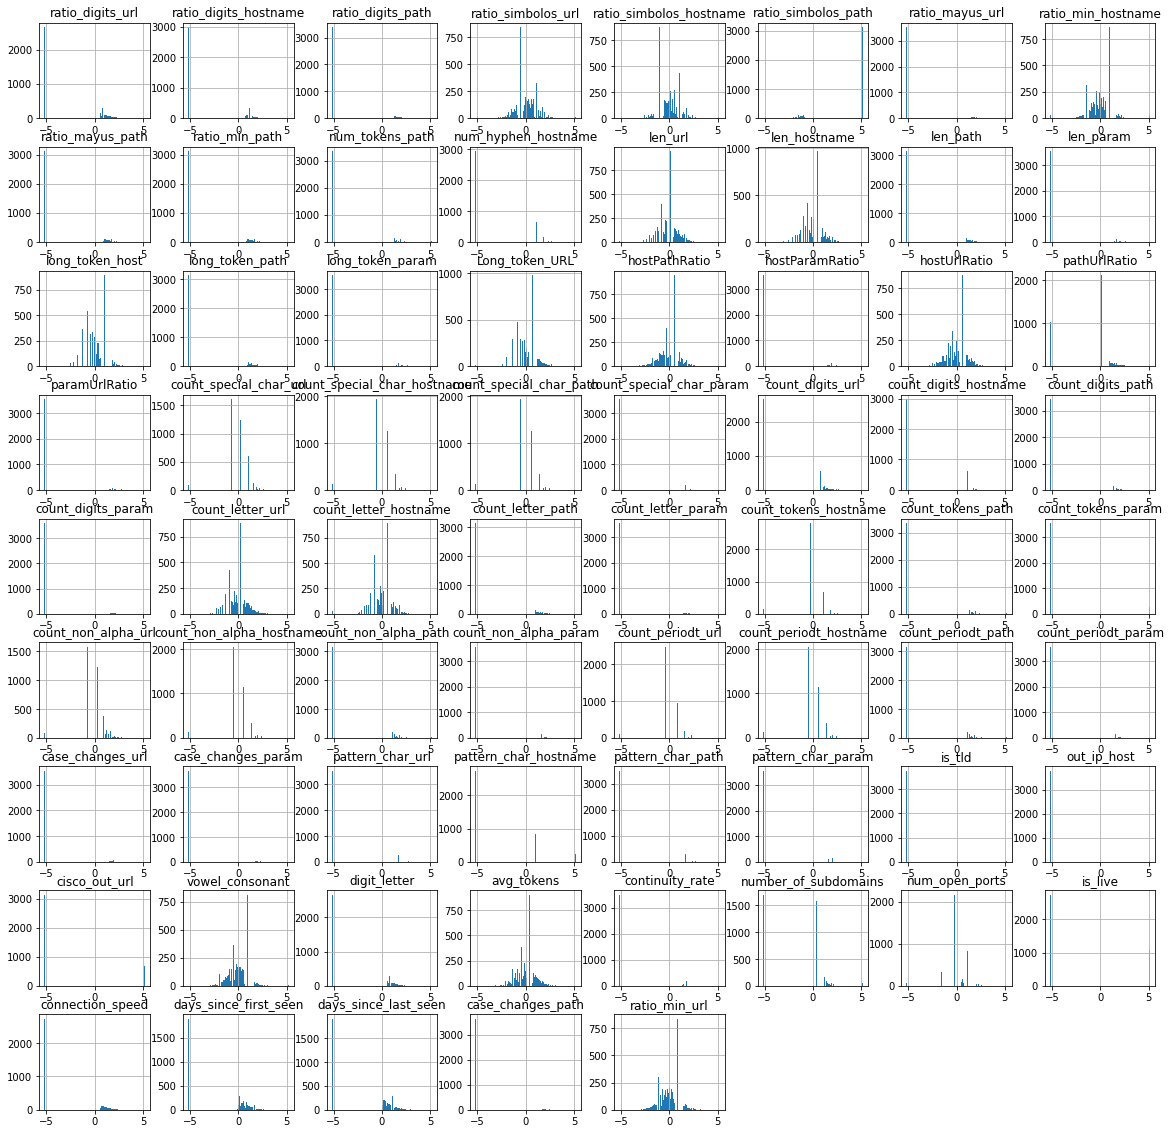

In [31]:
X_train_qsc.hist(bins=100,figsize=(20,20))

In [32]:
#plt.figure(figsize=(10,6))
#sns.kdeplot(X_clean['len_hostname'],shade=True,label='Sin estandarizar',color='b')
#sns.kdeplot(X_train_qsc['len_hostname'],shade=True,label='Estandarizar',color='r')
#sns.kdeplot(X_train_sc['avg_tokens'],shade=True,label='Estandarizar',color='g')
#plt.legend(labels=["Sin estandarizar","Estandarizado"])
#plt.xlim([-10,40])

### Estandarizacion

In [33]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
sc = StandardScaler()
X_train_sc = pd.DataFrame(sc.fit_transform(X_train), columns=X_clean_new.columns, index= X_train.index)
X_test_sc = pd.DataFrame(sc.transform(X_test), columns=X_clean_new.columns, index=X_test.index)
X_train_sc.head()

,ratio_digits_url,ratio_digits_hostname,ratio_digits_path,ratio_simbolos_url,ratio_simbolos_hostname,ratio_simbolos_path,ratio_mayus_url,ratio_min_hostname,ratio_mayus_path,ratio_min_path,...,avg_tokens,continuity_rate,number_of_subdomains,num_open_ports,is_live,connection_speed,days_since_first_seen,days_since_last_seen,case_changes_path,ratio_min_url
2763,1.936873,-0.279315,2.524197,0.002904,0.338555,-1.983253,0.406965,0.076245,1.699109,1.699109,...,-0.427193,-0.270082,-0.166828,-0.371681,1.588581,-0.097939,-0.619993,-0.383607,0.922092,-1.767903
2547,-0.428504,-0.279315,-0.302830,0.262925,0.119050,-1.915213,-0.201030,0.167493,2.501069,2.501069,...,0.120882,2.835036,-0.166828,-0.371681,1.588581,-0.078938,2.394817,-0.380198,-0.143356,0.298549
624,0.607612,-0.279315,1.110684,-0.338456,-0.664898,-1.983253,0.438145,0.493382,2.053660,2.053660,...,2.495872,-0.270082,-0.191348,-0.371681,1.588581,0.922590,-0.288315,1.709956,-0.143356,-0.522606
1777,-0.428504,-0.279315,-0.302830,-0.577020,-0.978477,0.466175,-0.201030,0.623737,-0.453521,-0.453521,...,-0.061810,-0.270082,-0.166828,0.804299,-0.629493,-0.219395,-0.619993,-0.383607,-0.143356,0.777636
2688,0.781003,-0.279315,0.982183,-3.164982,-0.400831,-2.469089,10.651893,0.383609,0.833662,0.833662,...,7.930945,-0.270082,-0.191348,-0.371681,1.588581,0.232659,-0.619993,-0.383607,14.240189,-4.364707


In [34]:
X_train_sc.describe().T

,count,mean,std,min,25%,50%,75%,max
ratio_digits_url,3809.0,-5.223207e-17,1.000131,-0.428504,-0.428504,-0.428504,0.148761,8.057286
ratio_digits_hostname,3809.0,2.564968e-17,1.000131,-0.279315,-0.279315,-0.279315,-0.279315,10.996999
ratio_digits_path,3809.0,-3.451048e-17,1.000131,-0.302830,-0.302830,-0.302830,-0.302830,6.367683
ratio_simbolos_url,3809.0,3.507011e-16,1.000131,-3.566797,-0.577020,-0.029726,0.746216,2.868908
ratio_simbolos_hostname,3809.0,2.145246e-16,1.000131,-2.105667,-0.978477,-0.074632,0.589418,4.728662
...,...,...,...,...,...,...,...,...
connection_speed,3809.0,-3.730862e-18,1.000131,-0.219395,-0.219395,-0.219395,-0.077977,51.244173
days_since_first_seen,3809.0,9.513699e-17,1.000131,-0.619993,-0.619993,-0.577858,0.363156,4.430259
days_since_last_seen,3809.0,2.984690e-17,1.000131,-0.383607,-0.383607,-0.380198,-0.196073,10.660450
case_changes_path,3809.0,-2.425061e-17,1.000131,-0.143356,-0.143356,-0.143356,-0.143356,14.240189


array([[<AxesSubplot:title={'center':'ratio_digits_url'}>,
        <AxesSubplot:title={'center':'ratio_digits_hostname'}>,
        <AxesSubplot:title={'center':'ratio_digits_path'}>,
        <AxesSubplot:title={'center':'ratio_simbolos_url'}>,
        <AxesSubplot:title={'center':'ratio_simbolos_hostname'}>,
        <AxesSubplot:title={'center':'ratio_simbolos_path'}>,
        <AxesSubplot:title={'center':'ratio_mayus_url'}>,
        <AxesSubplot:title={'center':'ratio_min_hostname'}>],
       [<AxesSubplot:title={'center':'ratio_mayus_path'}>,
        <AxesSubplot:title={'center':'ratio_min_path'}>,
        <AxesSubplot:title={'center':'num_tokens_path'}>,
        <AxesSubplot:title={'center':'num_hyphen_hostname'}>,
        <AxesSubplot:title={'center':'len_url'}>,
        <AxesSubplot:title={'center':'len_hostname'}>,
        <AxesSubplot:title={'center':'len_path'}>,
        <AxesSubplot:title={'center':'len_param'}>],
       [<AxesSubplot:title={'center':'long_token_host'}>,
     

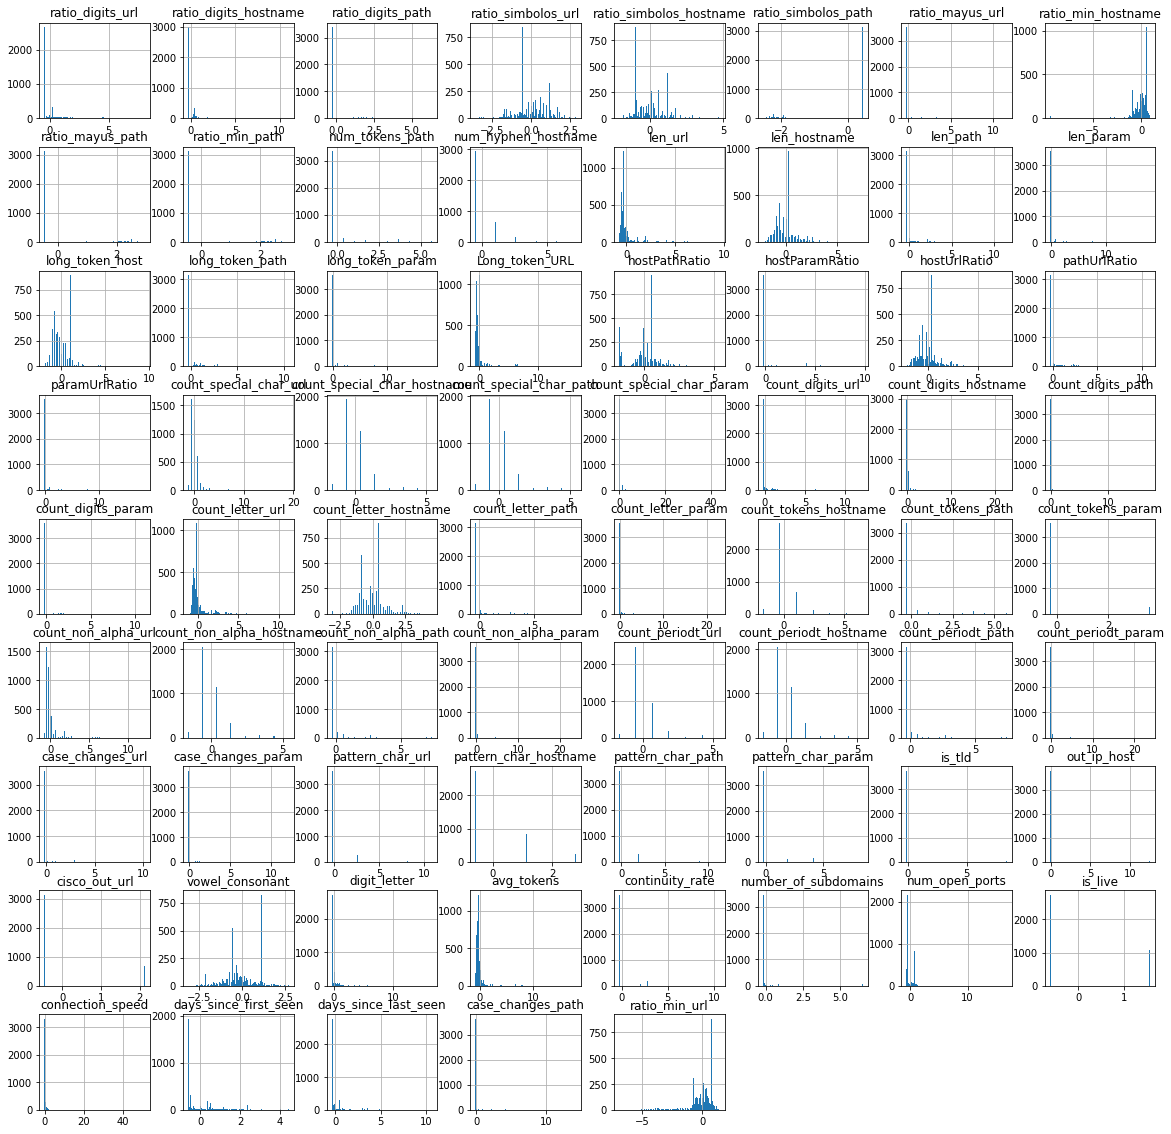

In [35]:
X_train_sc.hist(bins=100,figsize=(20,20))

#### Reducción de dimensiones

#### Ver distribución variable en dataset sin estandarizar, estandarización y transformación cuantil

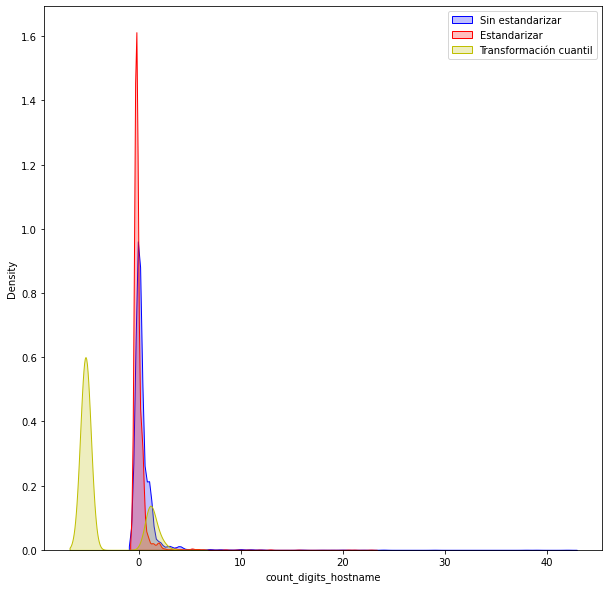

In [36]:
plt.figure(figsize=(10,10))
sns.kdeplot(X_clean['count_digits_hostname'],shade=True,label='Sin estandarizar',color='b')
sns.kdeplot(X_train_sc['count_digits_hostname'],shade=True,label='Estandarizar',color='r')
sns.kdeplot(X_train_qsc['count_digits_hostname'],shade=True,label='Transformación cuantil',color='y')
plt.legend(labels=["Sin estandarizar","Estandarizar","Transformación cuantil"])

## Correlación

Establecer independencia de las variables evaluando el nivel de correlación. En esta ocasión se evalua con el coeficiente de pearson al ser variables continuas

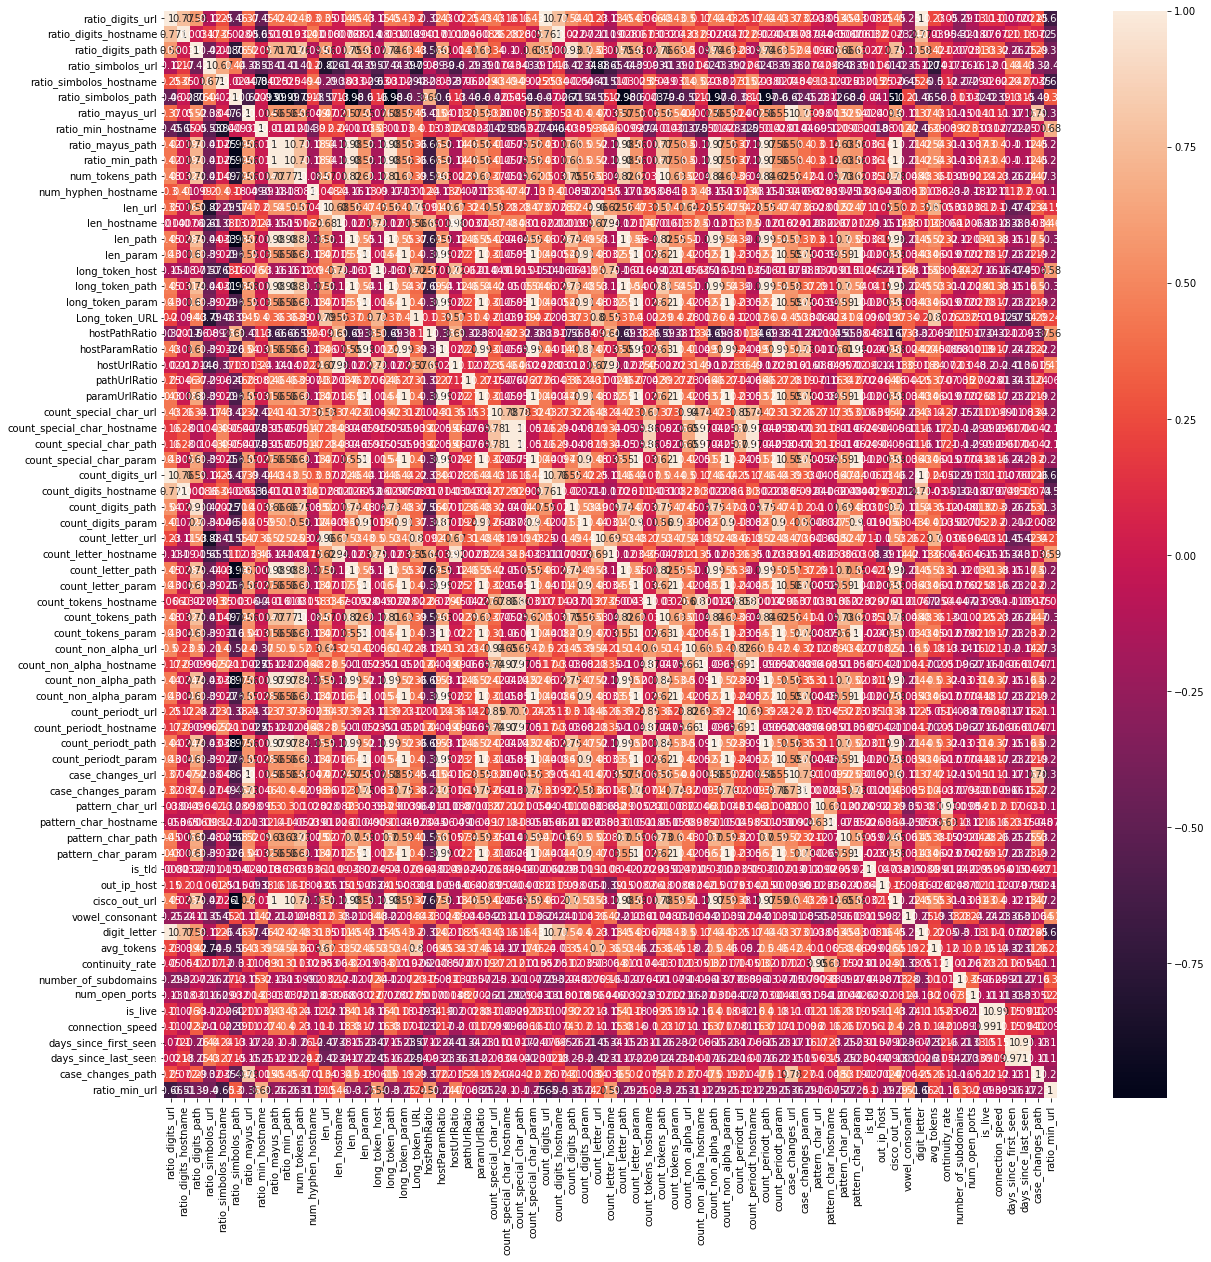

In [37]:
m_corr= X_train_qsc.corr(method='pearson')
plt.figure(figsize=(20, 20))
sns.heatmap(m_corr, annot=True)
plt.show()

In [38]:
m_corr
m_corr.shape[1]
list_cor=[]

for indice_fila, fila in m_corr.iterrows():  
    for col in m_corr:
        if str(fila)!=str(col):
            if m_corr[indice_fila][col]>=0.75 or m_corr[indice_fila][col]<=-0.75:
                    list_cor.append(col)
unique_list = []
[unique_list.append(x) for x in list_cor if x not in unique_list]
len(unique_list)

69

In [39]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k='all')
selector.fit(X_train_qsc, y_train)

C:\Users\afric\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k='all')

El selector se encarga de calcular los "p_values" para cada variable independiente. Si el p_value de una variable está por encima de un umbral predeterminado significa que no tiene una relación de dependencia con la variable a predecir por lo que podemos eliminarla. El umbral típico que se utiliza es 0.05.

NOTA: Es importante remarcar que la relaciones que se evaluan con estos métodos estadísticos son relaciones lineales, es probable que entre las variables también exista relaciones no lineales.

In [40]:
df2 = pd.DataFrame(X_train_qsc.columns, columns=['columnas'])
df2['p_valor'] = selector.pvalues_
df2.sort_values(by='p_valor')

,columnas,p_valor
23,pathUrlRatio,0.000000e+00
62,num_open_ports,2.379572e-106
65,days_since_first_seen,1.015875e-52
66,days_since_last_seen,1.520677e-46
64,connection_speed,1.743295e-39
...,...,...
24,paramUrlRatio,1.325011e-01
30,count_digits_hostname,2.755733e-01
32,count_digits_param,5.109557e-01
1,ratio_digits_hostname,5.184067e-01


Vamos a crear otra versión del dataset que solo conservará las características que cumplan con tener un p_value por debajo de 0.05.

In [41]:
new_vars = df2[df2["p_valor"] <= 0.05]
new_columns = new_vars["columnas"].values
new_columns

array(['ratio_digits_url', 'ratio_digits_path', 'ratio_simbolos_hostname',
       'ratio_simbolos_path', 'ratio_mayus_url', 'ratio_min_hostname',
       'num_tokens_path', 'num_hyphen_hostname', 'len_url',
       'len_hostname', 'len_path', 'long_token_host', 'long_token_path',
       'Long_token_URL', 'hostPathRatio', 'hostUrlRatio', 'pathUrlRatio',
       'count_special_char_url', 'count_special_char_hostname',
       'count_special_char_path', 'count_digits_url', 'count_digits_path',
       'count_letter_url', 'count_letter_hostname', 'count_letter_path',
       'count_tokens_hostname', 'count_tokens_path',
       'count_non_alpha_url', 'count_non_alpha_hostname',
       'count_non_alpha_path', 'count_periodt_url',
       'count_periodt_hostname', 'count_periodt_path', 'case_changes_url',
       'pattern_char_hostname', 'pattern_char_path', 'is_tld',
       'out_ip_host', 'cisco_out_url', 'vowel_consonant', 'digit_letter',
       'avg_tokens', 'continuity_rate', 'number_of_subdomain

In [42]:
print('Número de variables eliminadas: ', len(X_train.columns) - len(new_columns))

Número de variables eliminadas:  18


In [43]:
X_train_filtrado = X_train_qsc[new_columns]
X_test_filtrado = X_test_qsc[new_columns]

X_train_filtrado.head()

,ratio_digits_url,ratio_digits_path,ratio_simbolos_hostname,ratio_simbolos_path,ratio_mayus_url,ratio_min_hostname,num_tokens_path,num_hyphen_hostname,len_url,len_hostname,...,avg_tokens,continuity_rate,number_of_subdomains,num_open_ports,is_live,connection_speed,days_since_first_seen,days_since_last_seen,case_changes_path,ratio_min_url
2763,1.710968,1.792374,0.414267,-1.116369,1.541796,-0.248427,2.325972,-5.199338,1.449682,-1.278137,...,-0.858910,-5.199338,0.388430,-0.282216,5.199338,0.621087,-5.199338,-5.199338,1.844811,-1.620592
2547,-5.199338,-5.199338,0.188033,-1.002056,-5.199338,-0.076604,-5.199338,-5.199338,-0.226489,-1.018778,...,0.975466,1.811457,0.388430,-0.282216,5.199338,0.655924,1.689670,0.031369,-5.199338,0.082896
624,1.135284,1.321946,-0.352151,-1.116369,1.571286,0.404717,-5.199338,-5.199338,1.414698,-0.156199,...,2.004234,-5.199338,-5.199338,-0.282216,5.199338,1.651153,0.365531,1.579968,-5.199338,-0.776528
1777,-5.199338,-5.199338,-0.957454,5.199338,-5.199338,1.006211,-5.199338,-5.199338,0.146048,0.459820,...,0.361511,-5.199338,0.388430,1.097845,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.920412
2688,1.206312,1.284428,-0.189310,-2.747453,2.780372,0.251016,-5.199338,-5.199338,1.976943,-0.357496,...,2.866975,-5.199338,-5.199338,-0.282216,5.199338,1.041311,-5.199338,-5.199338,5.199338,-2.401541


In [44]:
X_prueba=X_train_sc.copy()
X_prueba["is_malicious"]=y_train["is_malicious"].copy()

## Seleccion de variables

### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

clf_rnd = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd.fit(X_train_sc, y_train)
y_pred = clf_rnd.predict(X_test_sc)
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))

F1 score: 0.956969750885468


C:\Users\afric\AppData\Local\Temp\ipykernel_18896\1068616196.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rnd.fit(X_train_sc, y_train)


In [46]:
# Importancia de las variables:

clf_rnd.feature_importances_

array([6.65480459e-03, 7.51727270e-03, 3.12975709e-03, 1.48406515e-02,
       1.93609129e-02, 7.86518044e-03, 1.24582082e-03, 2.70711350e-02,
       5.67454386e-03, 5.02112807e-03, 6.14068636e-04, 5.14008792e-03,
       2.32250896e-02, 2.13704845e-02, 1.23628229e-02, 7.85666114e-04,
       2.71793091e-02, 7.18877652e-03, 1.15526557e-03, 2.56353863e-02,
       2.21125307e-02, 3.00202763e-04, 3.82055694e-02, 2.77844290e-01,
       4.94738435e-03, 1.21395776e-02, 6.30634897e-03, 4.51283926e-03,
       1.99152486e-04, 5.13320580e-03, 4.47022132e-03, 3.23825843e-03,
       1.15571657e-03, 2.29422045e-02, 2.75431514e-02, 7.46655094e-03,
       1.82193387e-03, 4.21823079e-03, 1.53834137e-03, 3.26445820e-04,
       1.52753225e-02, 4.91423878e-03, 2.30597549e-03, 2.33458348e-04,
       3.40803990e-03, 8.37489953e-03, 4.41664929e-03, 5.95153693e-04,
       8.61907418e-04, 6.18565306e-04, 1.18656335e-03, 6.04558259e-03,
       6.51139096e-03, 7.46100644e-04, 1.58133406e-03, 3.47648458e-05,
      

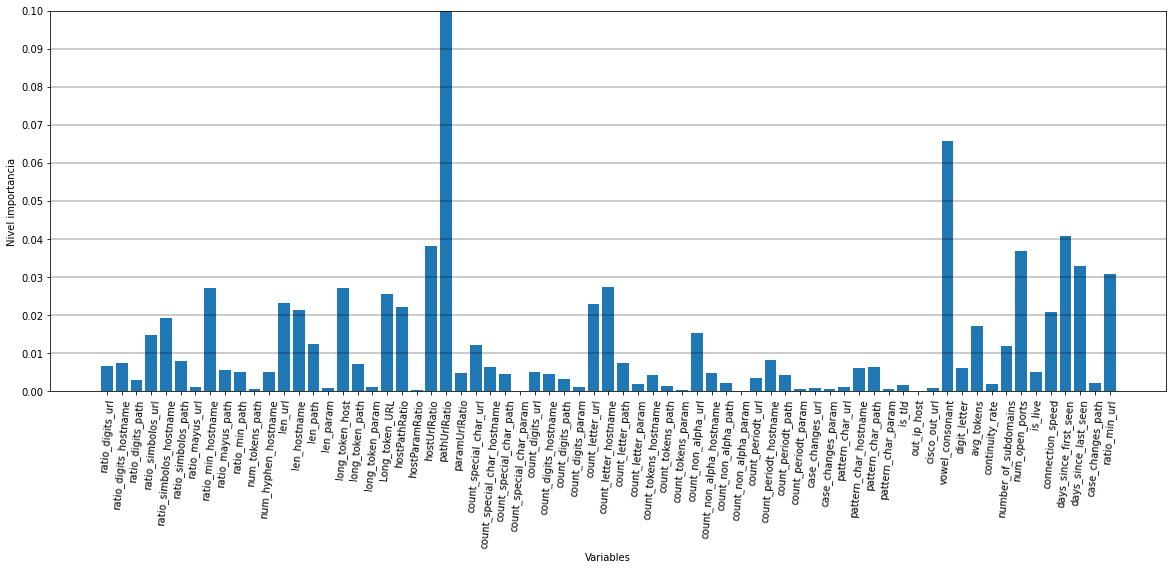

In [47]:
plt.figure(figsize =(20, 7))
plt.bar(range(len(clf_rnd.feature_importances_)), clf_rnd.feature_importances_)
plt.xticks(np.arange(69), X_train_sc.columns, rotation=85)
plt.ylabel("Nivel importancia")
plt.xlabel("Variables")
plt.axhline(y=0.01, color='k',linewidth=0.4, linestyle='-')
plt.axhline(y=0.02, color='k',linewidth=0.4, linestyle='-')
plt.axhline(y=0.03, color='k',linewidth=0.4, linestyle='-')
plt.axhline(y=0.04, color='k',linewidth=0.4, linestyle='-')
plt.axhline(y=0.05, color='k',linewidth=0.4, linestyle='-')
plt.axhline(y=0.06, color='k',linewidth=0.4, linestyle='-')
plt.axhline(y=0.07, color='k',linewidth=0.4, linestyle='-')
plt.axhline(y=0.08, color='k',linewidth=0.4, linestyle='-')
plt.axhline(y=0.09, color='k',linewidth=0.4, linestyle='-')
plt.savefig('RandomForest2.png')
plt.ylim([0,0.1])
plt.yticks([0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1])
plt.show()


In [379]:
X_test=X_train_qsc.copy()
X_test["is_malicious"]=Y.copy()

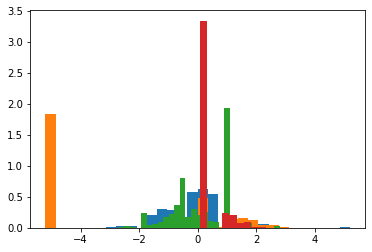

In [394]:
#Histograma 1D por cada variable
#Interpolar el histograma 1 D cada uno por separado
#mesh grid (bins de cada histograma interoplado)

vowel_not=plt.hist(X_test["vowel_consonant"][X_test['is_malicious'] == 0],bins=30,density=True)
hist_vowel_not=vowel_not[0]
ejes_vowel_not=(vowel_not[1][:-1]+vowel_not[1][1:])/2

path_not=plt.hist(X_test["pathUrlRatio"][X_test['is_malicious'] == 0],bins=30,density=True)
hist_path_not=path_not[0]
ejes_path_not=(path_not[1][:-1]+path_not[1][1:])/2
#path_not


vowel_is=plt.hist(X_test["vowel_consonant"][X_test['is_malicious'] == 1],bins=30,density=True)
hist_vowel_is=vowel_is[0]
ejes_vowel_is=(vowel_is[1][:-1]+vowel_is[1][1:])/2


path_is=plt.hist(X_test["pathUrlRatio"][X_test['is_malicious'] == 1],bins=30,density=True)
hist_path_is=path_is[0]
ejes_path_is=(path_is[1][:-1]+path_is[1][1:])/2


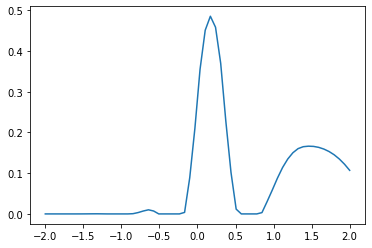

In [395]:
from scipy.interpolate import interp1d
x2=np.linspace(-2,2,60)
y2=np.linspace(-2,2,60)

f = interp1d(ejes_vowel_not,hist_vowel_not,kind='quadratic')
new_hist_vowel_not=f(x2)
bins_vowel_not=x2
#plt.plot(x2,new_hist_vowel_not)

f2 = interp1d(ejes_path_not[2:],hist_path_not[2:],kind='quadratic')
#plt.plot(x2,f(x2))
new_hist_path_not=f2(y2)
new_hist_path_not[new_hist_path_not<0]=0
bins_path_not=y2
plt.plot(y2,new_hist_path_not)

f3 = interp1d(ejes_vowel_is,hist_vowel_is,kind='quadratic')
#plt.plot(x2,f(x2))
new_hist_vowel_is=f3(x2)
new_hist_vowel_is[new_hist_vowel_is<0]=0
bins_vowel_is=x2
#plt.plot(x2,new_hist_vowel_is)

f4 = interp1d(ejes_path_is,hist_path_is,kind='quadratic')
#plt.plot(x2,f(x2))
new_hist_path_is=f4(y2)
new_hist_path_is[new_hist_path_is<0]=0
bins_path_is=y2
#plt.plot(y2,new_hist_path_is)

In [396]:
X_3d, Y_3d = np.meshgrid(bins_vowel_not, bins_path_not)
X_3d_m, Y_3d_m = np.meshgrid(bins_vowel_is, bins_path_is)

In [397]:
from numpy import array

B=new_hist_vowel_not.copy()
A=new_hist_path_not.copy()
H= [[0 for row in range(len(A))] for col in range(len(B))]
for i in range(len(A)):
    for j in range(len(B)):
          H[i][j]=A[i]*B[j]

H=array(H)
H=H*10

In [399]:

D=new_hist_vowel_is.copy()
C=new_hist_path_is.copy()
H_m= [[0 for row in range(len(C))] for col in range(len(D))]
for i in range(len(C)):
    for j in range(len(D)):
          H_m[i][j]=C[i]*D[j]

H_m=array(H_m)

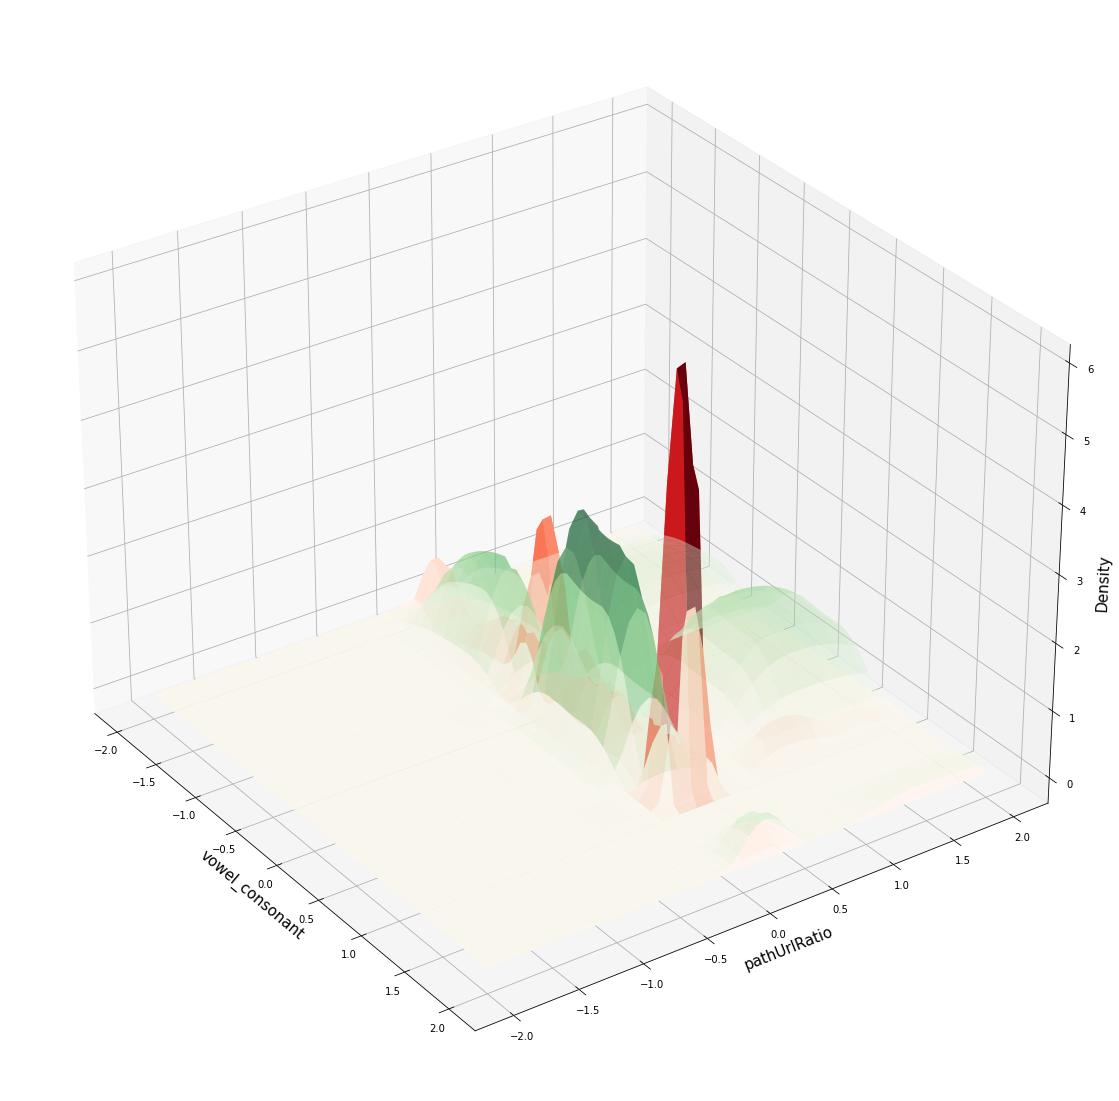

In [407]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, H, 50, cmap='binary')
ax.plot_surface(X_3d, Y_3d, H,
               cmap='Greens', edgecolor='none', alpha=0.4)

ax.plot_surface(X_3d_m, Y_3d_m, H_m,
                cmap='Reds', edgecolor='none',alpha=1)

ax.set_xlabel('vowel_consonant',fontsize=15)
ax.set_ylabel('pathUrlRatio',fontsize=15)
ax.set_zlabel('Density',fontsize=15)
ax.view_init(30, -35)


In [287]:
H, xedges, yedges= np.histogram2d(X_test["vowel_consonant"][X_test['is_malicious'] == 0], 
               X_test["pathUrlRatio"][X_test['is_malicious'] == 0], bins=25,range= [[-2,2], [-1, 2]],density=True)
H=(H.T)

In [50]:
H_m, xedges_m, yedges_m= np.histogram2d(X_test["vowel_consonant"][X_test['is_malicious'] == 1], 
               X_test["pathUrlRatio"][X_test['is_malicious'] == 1], bins=25,range= [[-2, 2], [-1, 2]],density=True)
H_m=H_m.T

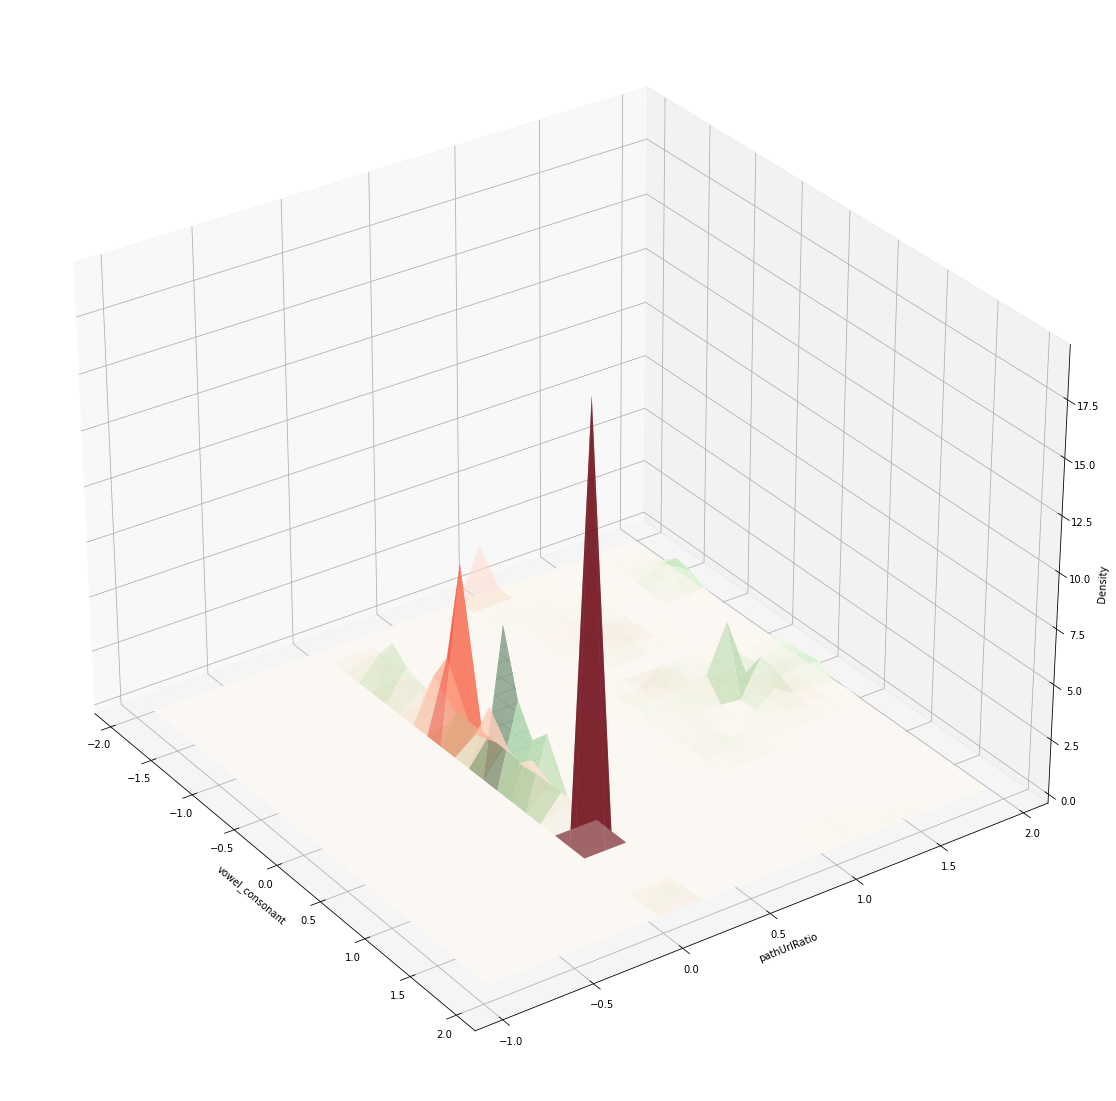

In [61]:
#Bueno
X_edges_new=(xedges[:-1]+xedges[1:])/2
Y_edges_new=(yedges[:-1]+yedges[1:])/2
X_3d, Y_3d = np.meshgrid(X_edges_new, Y_edges_new)


#Malo
X_edges_new_m=(xedges_m[:-1]+xedges_m[1:])/2
Y_edges_new_m=(yedges_m[:-1]+yedges_m[1:])/2
X_3d_m, Y_3d_m = np.meshgrid(X_edges_new_m, Y_edges_new_m)
#ax.contour3D(X, Y, H, 50, cmap='binary')

fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, H, 50, cmap='binary')
ax.plot_surface(X_3d, Y_3d, H, rstride=1, cstride=1,
                cmap='Greens', edgecolor='none', alpha=None)

ax.plot_surface(X_3d_m, Y_3d_m, H_m, rstride=1, cstride=1,
                cmap='Reds', edgecolor='none',alpha=0.6)

ax.set_xlabel('vowel_consonant')
ax.set_ylabel('pathUrlRatio')
ax.set_zlabel('Density')
ax.view_init(30, -35)


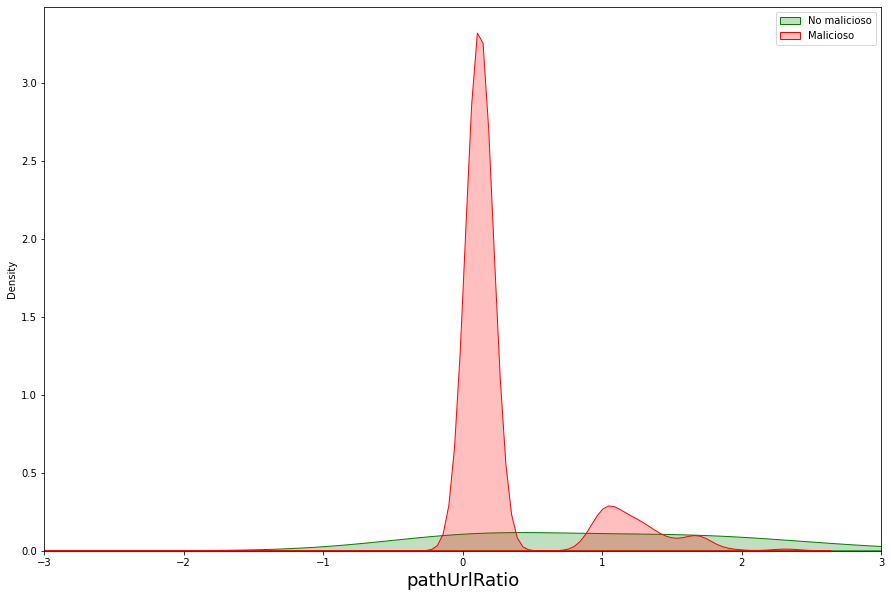

In [102]:
feature="pathUrlRatio"
#feature="vowel_consonant"

X_test=X_train_qsc.copy()
X_test["is_malicious"]=Y.copy()
plt.figure(figsize=(15,10))
sns.kdeplot(X_test[feature][X_test['is_malicious'] == 0],shade=True, label = 'Not malicious', color='green')
sns.kdeplot(X_test[feature][X_test['is_malicious'] == 1],shade=True, label = 'Malicious', color='red')
plt.xlim([-3,3])
plt.xlabel(feature, fontsize=18)
plt.legend(labels=["No malicioso","Malicioso"])
plt.savefig('foo.png', bbox_inches='tight')

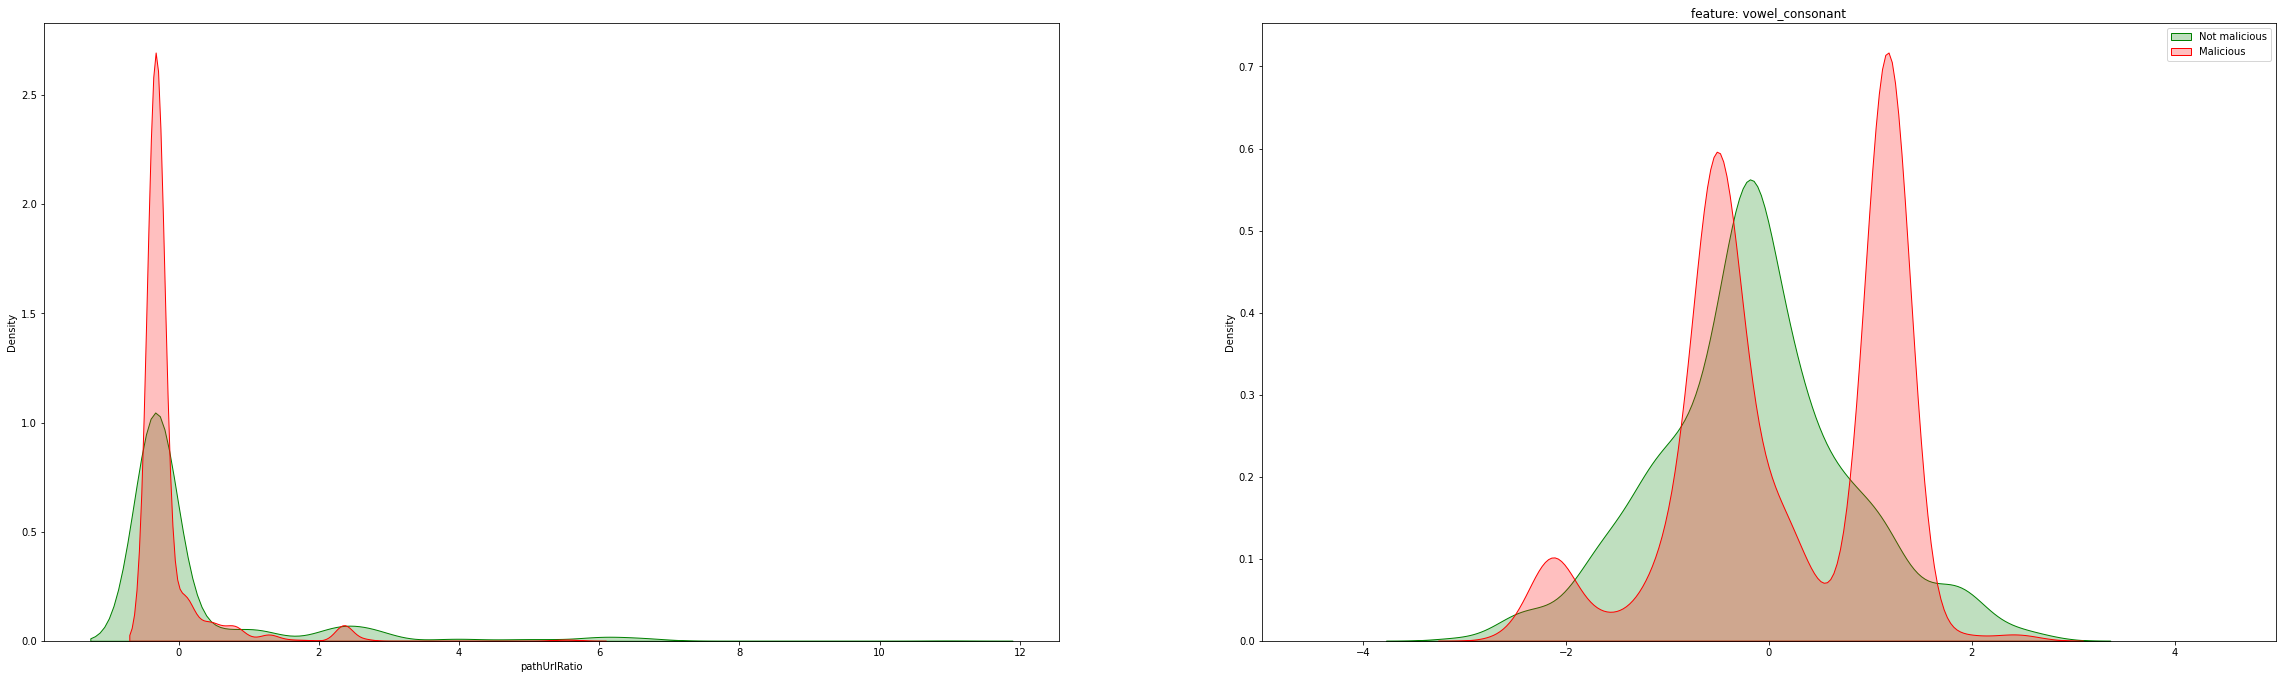

In [53]:
features =["pathUrlRatio","vowel_consonant"]

X_test=X_train_sc.copy()
X_test["is_malicious"]=Y.copy()

plt.figure(figsize=(40,25))
gs = gridspec.GridSpec(2, 2)
gs.update(hspace=0.2)

for i, f in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.kdeplot(X_test[f][X_test['is_malicious'] == 0],shade=True, label = 'Not malicious', color='green')
    sns.kdeplot(X_test[f][X_test['is_malicious'] == 1],shade=True, label = 'Malicious', color='red')

ax.set_xlabel('')
ax.set_xlim(-5,5)
ax.set_title('feature: ' + str(f))
ax.legend(loc=0)
plt.legend(loc = 0)
plt.savefig('foo.png', bbox_inches='tight')

In [431]:
# Podemos extraer que características son más importantes para la correcta clasificación de los datos
#feature_importances = {name: score for name, score in zip(list(X_train_sc), clf_rnd.feature_importances_)}
#feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
#print(feature_importances_sorted[40:])

In [432]:
print(f'Las 40 primeras variables representan un {np.round((feature_importances_sorted[:40].sum() * 100), 1)} %')

Las 40 primeras variables representan un 95.0 %


#### X_train y X_test estandarizado nos quedamos con las variables principales:

In [433]:
Xf = X_train_sc.drop(['count_digits_path', 'count_periodt_path', 'is_live', 'count_digits_hostname','count_periodt_url','count_tokens_hostname','ratio_digits_path', 'case_changes_path','continuity_rate','count_non_alpha_path','cisco_out_url','count_tokens_path','cisco_out_url','count_tokens_path','cisco_out_url','count_tokens_path','pattern_char_url','count_letter_param','len_param','case_changes_url','count_digits_param','count_non_alpha_param','ratio_mayus_url','is_tld','pattern_char_param','num_tokens_path','long_token_param','hostParamRatio','count_tokens_param','count_periodt_param','case_changes_param','count_special_char_param','count_special_char_param','out_ip_host'],axis=1)       

In [434]:
Xf_test=X_test_sc.drop(['count_digits_path', 'count_periodt_path', 'is_live', 'count_digits_hostname','count_periodt_url','count_tokens_hostname','ratio_digits_path', 'case_changes_path','continuity_rate','count_non_alpha_path','cisco_out_url','count_tokens_path','cisco_out_url','count_tokens_path','cisco_out_url','count_tokens_path','pattern_char_url','count_letter_param','len_param','case_changes_url','count_digits_param','count_non_alpha_param','ratio_mayus_url','is_tld','pattern_char_param','num_tokens_path','long_token_param','hostParamRatio','count_tokens_param','count_periodt_param','case_changes_param','count_special_char_param','count_special_char_param','out_ip_host'],axis=1)

#### X_train_filtrado y X_test_filtrado (estandarización quantil y quitar variables correlacionadas) nos quedamos ocn las variables principales:

In [435]:
X_train_filtrado_feature_selection=X_train_filtrado.drop(["ratio_digits_path","ratio_mayus_url","num_tokens_path","count_digits_path","count_tokens_hostname","count_tokens_path","count_non_alpha_path","count_periodt_url","count_periodt_path","case_changes_url","is_tld","out_ip_host","cisco_out_url","continuity_rate","is_live","case_changes_path"],axis=1)

In [436]:
X_test_filtrado_feature_selection=X_test_filtrado.drop(["ratio_digits_path","ratio_mayus_url","num_tokens_path","count_digits_path","count_tokens_hostname","count_tokens_path","count_non_alpha_path","count_periodt_url","count_periodt_path","case_changes_url","is_tld","out_ip_host","cisco_out_url","continuity_rate","is_live","case_changes_path"],axis=1)

## Modelo y métricas

#### Entrenar modelos

Para entrenar diferentes modelos con las diferentes versiones del dataset se puede realizar la evaluación de dos formas:

Generar una partición adicional para la validación (tendríamos: X_train, X_val, X_test)

Utilizar validación cruzada.

In [437]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, recall_score, precision_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### GAUSSIANO

In [439]:

model = GaussianNB()
#precision = cross_val_score(model, X_train_filtrado, y_train, scoring="precision", cv=10)
#print("Accuracy GaussianNB:"+ str(precision.mean()))
model.fit(X_train_filtrado_feature_selection, y_train)

#y_pred = model.predict(X_test_filtrado_feature_selection)
#y_train_pred = model.predict(X_train_filtrado_feature_selection)

y_pred = model.predict(X_test_filtrado_feature_selection)
y_train_pred = model.predict(X_train_filtrado_feature_selection)

#print("Accuracy in training", metrics.accuracy_score(y_train, y_train_pred))
print("Accuracy :  ", metrics.accuracy_score(y_test, y_pred))
print("------------------------------------------------------------")
print(classification_report(y_test, y_pred))
cf_matrix=confusion_matrix(y_test, y_pred)


Accuracy :   0.8247639034627492
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.74      0.88      0.81       393
         1.0       0.90      0.79      0.84       560

    accuracy                           0.82       953
   macro avg       0.82      0.83      0.82       953
weighted avg       0.84      0.82      0.83       953



Matriz de confusion Naïve Bayes
[[346  47]
 [120 440]]


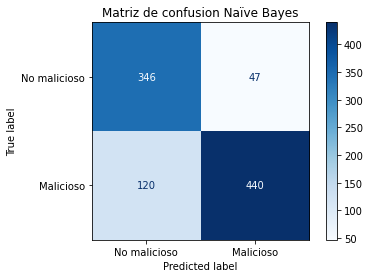

In [440]:
titles_options = [
    ("Matriz de confusion Naïve Bayes", None)
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test_filtrado_feature_selection,
        y_test,
        display_labels=["No malicioso","Malicioso"],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### SVC

In [441]:

model=svm.SVC()

model.fit(Xf, y_train)

y_pred = model.predict(Xf_test)
y_train_pred = model.predict(Xf)

#print("Accuracy in training", metrics.accuracy_score(y_train, y_train_pred))
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))
print("------------------------------------------------------------")
print(classification_report(y_test, y_pred))

Accuracy :  0.9087093389296957
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.89       393
         1.0       0.95      0.89      0.92       560

    accuracy                           0.91       953
   macro avg       0.90      0.91      0.91       953
weighted avg       0.91      0.91      0.91       953



Matriz de confusion SVM
[[368  25]
 [ 62 498]]


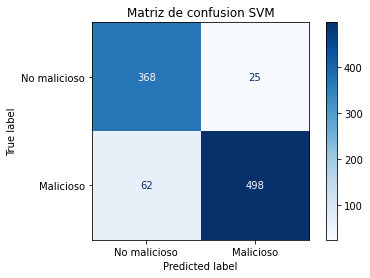

In [442]:
titles_options = [
    ("Matriz de confusion SVM", None)
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        Xf_test,
        y_test,
        display_labels=["No malicioso","Malicioso"],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### LOGISTIC REGRESSION

In [450]:

import warnings
warnings.filterwarnings("ignore")
model = LogisticRegression(random_state=0)

model.fit(Xf, y_train)

y_pred = model.predict(Xf_test)
y_train_pred = model.predict(Xf)

#print("Accuracy in training", metrics.accuracy_score(y_train, y_train_pred))
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))
print("------------------------------------------------------------")
print(classification_report(y_test, y_pred))

Accuracy :  0.9275970619097587
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91       393
         1.0       0.91      0.97      0.94       560

    accuracy                           0.93       953
   macro avg       0.93      0.92      0.92       953
weighted avg       0.93      0.93      0.93       953



Matriz de confusion logistic Regression
[[340  53]
 [ 16 544]]


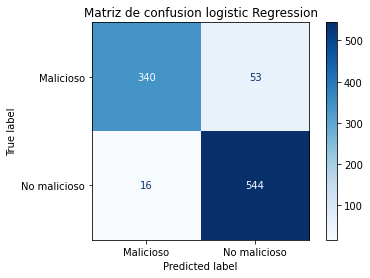

In [451]:
titles_options = [
    ("Matriz de confusion logistic Regression", None)
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        Xf_test,
        y_test,
        display_labels=["Malicioso","No malicioso"],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### RANDOM FOREST

In [445]:

model = RandomForestClassifier(n_estimators=100)

#precision = cross_val_score(model, X_train_qsc, y_train, scoring="precision", cv=10)
#print("Accuracy Random Forest :"+ str(precision.mean()))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

#print("Accuracy in training", metrics.accuracy_score(y_train, y_train_pred))
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))
print("------------------------------------------------------------")
print(classification_report(y_test, y_pred))

Accuracy :  0.9590766002098636
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       393
         1.0       0.97      0.96      0.97       560

    accuracy                           0.96       953
   macro avg       0.96      0.96      0.96       953
weighted avg       0.96      0.96      0.96       953



Matriz de confusion Random Forest
[[374  19]
 [ 20 540]]


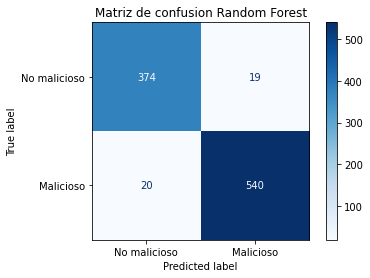

In [446]:
titles_options = [
    ("Matriz de confusion Random Forest", None)
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels=["No malicioso","Malicioso"],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [447]:
feature_names=X_train.columns

### ARBOL DE DECISION

Optimización de hiperparametros

In [438]:
#tuned_hyperparameters = [{'max_depth': np.arange(3, 10),
#                     'max_weights': [1, 10, 100, 1000]},
#                     'criterion': ['gini', 'entropy'], 
#                     'splitter': ['best', 'random'],
#                    # 'min_samples_leaf': [2, 5, 10],
#                     'class_weight':['balanced', None],
#                     'max_leaf_nodes': [None, 5, 10, 20]
#                    }]

#scores = ['precision', 'recall']

#for score in scores:
#    print("# Tuning hyperparameters for %s" % score)
#    print()

#    if score == 'precision':
#        scorer = make_scorer(precision_score, average='weighted', zero_division=0)
#    elif score == 'recall':
#        scorer = make_scorer(recall_score, average='weighted', zero_division=0)
    
    # cv = the fold of the cross-validation cv, defaulted to 5
#    gs = GridSearchCV(DecisionTreeClassifier(), tuned_hyperparameters, cv=10, scoring=scorer)
#    gs.fit(X_train, y_train)

#    print("Best hyperparameters set found on development set:")
#    print()
#    print(gs.best_params_)
#    print()
#    print("Grid scores on development set:")
#    print()
#    means = gs.cv_results_['mean_test_score']
#    stds = gs.cv_results_['std_test_score']

In [448]:

max_depth=9
random_state=1
class_weight= 'balanced'
criterion='gini'
max_depth= 9
max_leaf_nodes=None
splitter='best'

model = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=random_state,class_weight=class_weight,criterion=criterion,max_leaf_nodes=max_leaf_nodes,splitter=splitter)
#precision = cross_val_score(model, X_train_qsc, y_train, scoring="precision", cv=10)
#print("Accuracy Decision Tree :"+ str(precision.mean()))
#print("Accuracy SVC:"+ str(precision.mean()))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

#print("Accuracy in training", metrics.accuracy_score(y_train, y_train_pred))
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))
print("------------------------------------------------------------")
print(classification_report(y_test, y_pred))


Accuracy :  0.9338929695697796
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       393
         1.0       0.94      0.95      0.94       560

    accuracy                           0.93       953
   macro avg       0.93      0.93      0.93       953
weighted avg       0.93      0.93      0.93       953



Matriz de confusion Arbol de decisión
[[360  33]
 [ 30 530]]


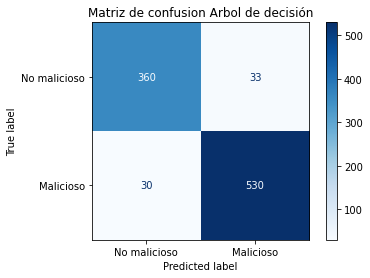

In [449]:
titles_options = [
    ("Matriz de confusion Arbol de decisión", None)
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels=["No malicioso","Malicioso"],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()